In [2]:
println!("Hello world");

Hello world


In [7]:
:dep egg
// https://docs.rs/egg/latest/egg/tutorials/_02_getting_started/index.html
use egg::*;
// Since parsing can return an error, `unwrap` just panics if the result doesn't return Ok
let my_expression: RecExpr<SymbolLang> = "(foo a b)".parse().unwrap();
println!("this is my expression {}", my_expression);

// let's try to create an e-node, but hmmm, what do I put as the children?
let my_enode = SymbolLang::new("bar", vec![]);
let mut expr = RecExpr::default();
let a = expr.add(SymbolLang::leaf("a"));
let b = expr.add(SymbolLang::leaf("b"));
let foo = expr.add(SymbolLang::new("foo", vec![a, b]));

// we can do the same thing with an EGraph
let mut egraph: EGraph<SymbolLang, ()> = Default::default();
let a = egraph.add(SymbolLang::leaf("a"));
let b = egraph.add(SymbolLang::leaf("b"));
let foo = egraph.add(SymbolLang::new("foo", vec![a, b]));

// we can also add RecExprs to an egraph
let foo2 = egraph.add_expr(&expr);
// note that if you add the same thing to an e-graph twice, you'll get back equivalent Ids
assert_eq!(foo, foo2);


this is my expression (foo a b)


Could try looking at cop-rs also

Grab RecExpr from egg. Keeping an open datatype that can have user mixins is interesting...
https://docs.rs/egg/latest/src/egg/language.rs.html#368-370

Discrimination tree
Make maturin bindings

Demand driven: Goal is to get gropu theory example to run.


In [ ]:
#[derive(Debug, Clone, PartialEq, Eq, PartialOrd, Ord, Hash)]
pub struct RecExpr<L> {
    nodes: Vec<L>,
}

/// A simple language used for testing.
#[derive(Debug, Hash, PartialEq, Eq, Clone, PartialOrd, Ord)]
#[cfg_attr(feature = "serde-1", derive(serde::Serialize, serde::Deserialize))]
enum SymbolLang {
    Fn {
    /// The operator for an enode
    pub op: Symbol,
    /// The enode's children `Id`s
    pub children: Vec<Id>},
    Var { name : Symbol, id : usize}
}

fn unify( a: &RecExpr<SymbolLang>, b: &RecExpr<SymbolLang>) -> Subst {
    // todo
}

struct DiscTrie<A> {
    values : Vec<(RecExpr<SymbolLang>, A)>,
    children : HashMap<Symbol, DiscTrie>
}


https://github.com/evcxr/evcxr/blob/main/evcxr_jupyter/README.md

https://datacrayon.com/shop/product/data-analysis-with-rust-notebooks/

Do solvers in here?
Mini egglog?




In [5]:
let x = 4;
dbg!("booo", 1, x)

[src/lib.rs:114:1] "booo" = "booo"
[src/lib.rs:114:1] 1 = 1
[src/lib.rs:114:1] x = 4


("booo", 1, 4)

In [9]:
#[derive(Debug)]
enum Term {
    Var(String),
    Const(String, Vec<Term>)
}

In [ ]:
#[derive(Debug)]
enum STerm { // a cached term
    Var(Symbol),
    Const(Symbol, Vec<usize>)
}
#[derive(Debug)]
struct RecTerm {
    sterm: Vec<STerm>
}

In [11]:
Term::Var("hllwo".to_string())

Var("hllwo")

In [12]:
:dep evcxr_input
let name = evcxr_input::get_string("Name?");
let password = evcxr_input::get_password("Password?");

In [35]:
:dep sleigh
// https://github.com/black-binary/sleigh

// https://github.com/rbran/sleigh-rs https://github.com/rbran/sleigh2rust
// https://github.com/rbran/sleigh3rust
// https://github.com/rbran/ice-kola

// https://github.com/kajaaz/pcode-parser/tree/main


Error: failed to write /tmp/rustcx5CsB3/lib.rmeta: No space left on device (os error 28)

Error: failed to write to `/tmp/.tmpoEnzag/target/debug/deps/rmetaEj9I1H/lib.rmeta`: No space left on device (os error 28)

Error: failed to write to `/tmp/.tmpoEnzag/target/x86_64-unknown-linux-gnu/debug/deps/rmetac8W3aV/lib.rmeta`: No space left on device (os error 28)

In [ ]:
use sleigh::{Decompiler, X86Mode};

let mut decompiler = Decompiler::builder().x86(X86Mode::Mode32).build();

let code = b"\x01\xd8"; // ADD EAX, EBX

// Lift bytecodes into SLEIGH IL
let (len, pcodes) = decompiler.translate(code, 0x1000);
println!("{} {:?}", len, pcodes);

// Disasm bytecodes
let (len, insts) = decompiler.disassemble(code, 0x1000);
println!("{} {:?}", len, insts);

In [13]:
name

"fred"

In [14]:
:dep plotly = { version = ">=0.6.0" }
:dep itertools-num = "0.1.3"

In [15]:
extern crate plotly;
extern crate rand_distr;
extern crate itertools_num;
extern crate itertools;

In [ ]:
use itertools_num::linspace;
use plotly::common::{
    ColorScale, ColorScalePalette, DashType, Fill, Font, Line, LineShape, Marker, Mode, Title,
};
use plotly::layout::{Axis, BarMode, Layout, Legend, TicksDirection};
use plotly::{Bar, NamedColor, Plot, Rgb, Rgba, Scatter};
use rand_distr::{Distribution, Normal, Uniform};

In [ ]:
let n: usize = 100;
let t: Vec<f64> = linspace(0., 10., n).collect();
let y: Vec<f64> = t.iter().map(|x| x.sin()).collect();

let trace = Scatter::new(t, y).mode(Mode::Markers);
let mut plot = Plot::new();
plot.add_trace(trace);
let layout = Layout::new().height(800);
plot.set_layout(layout);
plot.lab_display();

In [23]:
:dep petgraph-evcxr
:dep petgraph

In [24]:
extern crate petgraph;
extern crate petgraph_evcxr;

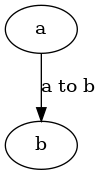

In [27]:
use petgraph::graph::{Graph, NodeIndex};
use petgraph_evcxr::draw_graph;
let mut g : Graph<&str, &str> = Graph::new();
let a = g.add_node("a");
let b = g.add_node("b");
g.add_edge(a, b, "a to b");
draw_graph(&g);

In [28]:
:dep showata = { version = "0.3", features=["show_ndarray"]}
:dep ndarray = "0.14"

use showata::Showable;
use ndarray::Array2;

let data: Array2::<_> = Array2::<f64>::zeros((3, 4));
data.show()

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [30]:
:help

:allow_static_linking,Set whether to allow static linking of dependencies (0/1)
:build_env,Set environment variables when building code (key=value)
:cache,"Set cache size in MiB, or 0 to disable."
:clear,"Clear all state, keeping compilation cache"
:clear_cache,Clear the cache used by the :cache command
:codegen_backend,Set/print the codegen backend. Requires nightly
:dep,"Add dependency. e.g. :dep regex = ""1.0"""
:doc,"show the documentation of a variable, keyword, type or module"
:efmt,Set the formatter for errors returned by ?
:env,Set an environment variable (key=value)
:explain,Print explanation of last error


In [31]:
:vars

Variable,Type
a,NodeIndex
b,NodeIndex
x,i32
data,"ndarray::prelude::ArrayBase<ndarray::OwnedRepr<f64>, ndarray::prelude::Dim<[usize; 2]>>"
password,String
name,String
g,"Graph<&str, &str>"


In [32]:
:type x

x: i32

sccache needs to be installed cache, 

In [34]:
:doc i32

i32


The 32-bit signed integer type.